# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 1

    

---



Ο στόχος της εργασίας είναι η εφαρμογή αλγορίθμων αναζήτησης και εύρεσης καλύτερου μονοπατιού σε λαβύρινθο διαστάσεων $N\times N$


## Κώδικας visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        '''
          Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
          Είσοδος: 
          -> S: το σημείο εκκίνσης της αναζήτησης
          -> F: το σημείο τερματισμού
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
          Είσοδος: 
          -> grid: Ένα χάρτης τύπου grid
          -> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
          -> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
          Επιστρέφει: None
          Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[~grid.grid] = [0, 0, 0]
        image[grid.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[grid.grid] = [0, 0, 0]
        # image[~grid.grid] = [255, 255, 255]
        
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
          Είσοδος:
          -> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
          Έξοδος: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (100):
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
            Είσοδος:
            -> Το όνομα του αρχείου με κατάληξη .gif
            Έξοδος: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Η συνάρτηση αυτή εμφανίζει inline το animation.
            Είσοδος:
            -> fps: τα frames per second
            Έξοδος: Το αντικείμενο που παίζει το animation
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
            Είσοδος:
            Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
            Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

# Εκφώνηση

## Μέρος 1
Ο στόχος του πρώτου μέρους είναι η κατασκευή **λαβυρίνθων**. [Σε αυτό το άρθρο της Wikipedia](https://en.wikipedia.org/wiki/Maze_generation_algorithm) μπορείτε να βρείτε διάφορους αλγορίθμους για αυτό το σκοπό, συμπεριλαμβανομένου κι αυτού που χρησιμοποιείται παρακάτω. Προσέξτε ότι οι αλγόριθμοι του παραπάνω άρθρου κατασκευάζουν ένα μόνο μονοπάτι από κάθε σημείο του λαβυρίνθου προς οποιοδήποτε άλλο (η δομή του λαβυρίνθου έχει μορφή συνεκτικού δέντρου). Καλείστε να συμπληρώσετε τον κώδικα στα σημεία που λείπει ώστε οι λαβύρινθοι που κατασκευάζει τυχαία να έχουν μεταβλητή πυκνότητα εμποδίων/τοίχων (καθορίζεται από την παράμετρο threshold). Όλοι οι χάρτες θα πρέπει να έχουν τουλάχιστον ένα μονοπάτι μεταξύ ενός σημείου αφετηρίας (S) και ενός σημείου τερματισμού (F). 

Σε όλα τα ερωτήματα φροντίστε να χρησιμοποιήσετε **δομημένο** κώδικα, με **σχόλια** που επισημαίνουν τη λογική του.


### Παραδείγματα λαβυρίνθων
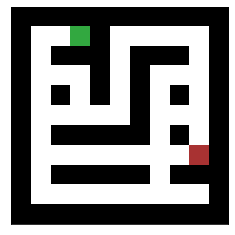
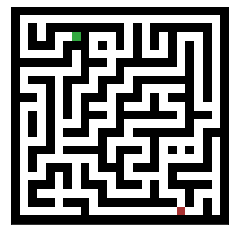
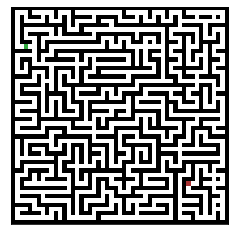

## Μέρος 1

In [100]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random 
import matplotlib.pyplot as plt


class Maze:
    def __init__(self, N, S, F, threshold=0):

        """
        N: integer that indicates the size of the NxN grid of the maze
        S: pair of integers that indicates the coordinates of the starting point (S)
        F: pair of integers that indicates the coordinates of the finish point (F)
        You can add any other parameters you want to customize maze creation (e.g. variables that
        control the creation of additional paths)
        """
        
        assert N > 2
        # Make sure start and end are within the grid
        assert S[0] < N - 1
        assert S[1] < N - 1
        assert F[0] < N - 1
        assert F[1] < N - 1

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N
        self.S = S
        self.F = F

        # Keep track of the agents in the Maze
        self.agents=[]

        ## Initialize grid 
        self.grid = np.zeros((N, N), dtype=bool)
        walls = []
    
        def append_walls(x,y,walls_list):
            
            if x - 1 > 1 and not self.grid[x-1,y]:
                if (x-1,y,"down") in walls_list:
                    walls_list.remove((x-1,y,"down"))
                else:
                    walls.append((x-1,y,"up"))

                
            if x + 1 < self.N-2 and not self.grid[x+1,y]:
                if (x+1,y,"up") in walls_list:
                    walls_list.remove((x+1,y,"up"))
                else:
                    walls.append((x+1,y,"down"))
                
            if y - 1 > 1 and not self.grid[x,y-1]:
                if (x,y-1,"right") in walls_list:
                    walls_list.remove((x,y-1,"right"))
                else:
                    walls.append((x,y-1,"left"))
                
            if y + 1 < self.N-2 and not self.grid[x,y+1]:
                if (x,y+1,"left") in walls_list:
                    walls_list.remove((x,y+1,"left"))
                else:
                    walls.append((x,y+1,"right"))

        #start from S
        self.grid[S[0],S[1]] = 1
        append_walls(S[0],S[1],walls)
        
        while len(walls) != 0:
            #print(walls,"\n")
            temp_wall_ind = random.randint(0,len(walls)-1)
            temp_wall = walls[temp_wall_ind]
            walls.pop(temp_wall_ind)
            
            if temp_wall[2] == "left":
                #check if +2 is not already cell
                if self.grid[temp_wall[0],temp_wall[1]-1]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0],temp_wall[1]-1] = 1
                    append_walls(temp_wall[0],temp_wall[1]-1,walls)
                    
            if temp_wall[2] == "right":
                #check if +2 is not already cell
                if self.grid[temp_wall[0],temp_wall[1]+1]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0],temp_wall[1]+1] = 1
                    append_walls(temp_wall[0],temp_wall[1]+1,walls)
            
            if temp_wall[2] == "up":
                #check if +2 is not already cell
                if self.grid[temp_wall[0]-1,temp_wall[1]]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0]-1,temp_wall[1]] = 1
                    append_walls(temp_wall[0]-1,temp_wall[1],walls)
            
            if temp_wall[2] == "down":
                #check if +2 is not already cell
                if self.grid[temp_wall[0]+1,temp_wall[1]]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0]+1,temp_wall[1]] = 1
                    append_walls(temp_wall[0]+1,temp_wall[1],walls)
            
        #Now connect with F
        self.grid[F[0],F[1]] = 1
        
        if threshold > 0:
            while np.count_nonzero(self.grid == True) / ((self.N**2)-4*self.N+4) < threshold:
                self.grid[random.randint(1,N-2),random.randint(1,N-2)] = True
    
    def adjacent_no_walls(self, node):
        x, y = node
        ret = []
        if x - 1 > -1 and self.grid[x-1,y]:
            ret.append((x-1,y))
        if x + 1 < self.N and self.grid[x+1,y]:
            ret.append((x+1,y))
        if y - 1 > -1 and self.grid[x,y-1]:
            ret.append((x,y-1))
        if y + 1 < self.N and self.grid[x,y+1]:
            ret.append((x,y+1))
        return ret

    def adjust(self,F):
        x,y = F
        def nn(Z):
            a, b = Z
            return int(self.grid[a,b+1]) + int(self.grid[a,b-1]) + int(self.grid[a-1,b]) + int(self.grid[a+1,b])
        
        if  nn(F) == 0:
   
            if x == 1 and y == 1:
                if nn((x,y)) > nn((x,y)):
                    self.grid[x,y] = True
                else:
                    self.grid[x,y] = True
                    
            elif x == 1 and y == self.N-2:
                if nn((x+1,y)) > nn((x,y-1)):
                    self.grid[x,y-1] = True
                else:
                    self.grid[x+1,y] = True
                    
            elif x == self.N-2 and y == 1:
                if nn((x-1,y)) > nn((x,y+1)):
                    self.grid[x,y+1] = True
                else:
                    self.grid[x-1,y] = True
                    
            elif x == self.N-2 and y == self.N-2:
                if nn((x-1,y)) > nn((x,y-1)):
                    self.grid[x,y-1] = True
                else:
                    self.grid[x-1,y] = True
                    
            elif x > 1 and x < self.N-2:
                if nn((x-1,y)) > nn((x+1,y)):
                    self.grid[x+1,y] = True
                else:
                    self.grid[x-1,y] = True
            
            else:
            #elif y > 1 and y < self.N-2:
                if nn((x,y-1)) > nn((x,y+1)):
                    self.grid[x,y+1] = True
                else:
                    self.grid[x,y-1] = True
        else:
            pass
        
    def print_F(self):
        print(self.grid[self.F])
    def get_S(self):
        return self.S
    def get_F(self):
        return self.F
    
    def draw_map(self, path=None,return_image=False,front_cells=None):

        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[self.grid] = [0, 0, 0]
        # image[~self.grid] = [255, 255, 255]
        self.adjust(self.F)
        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        
        if front_cells:
            for n in front_cells:
                image[n[0], n[1]] = [132,112,255]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        if len(self.agents)>0:
          for a in self.agents:
            image[a.location]=a.color

        if return_image:
          return image
        else:
          plt.imshow(image)
          plt.xticks([])
          plt.yticks([])
          plt.show()    

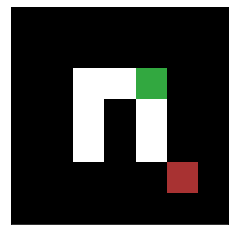

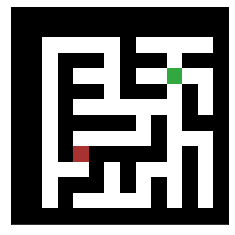

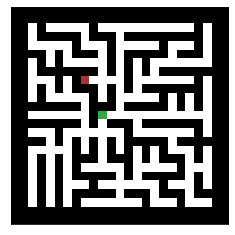

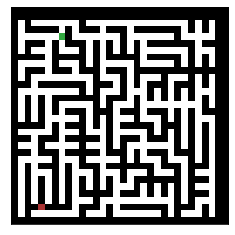

In [3]:
for i in [7,14,25,32]:    
    N, S, F = i, (random.randint(1, i-2), random.randint(1, i-2)),(random.randint(1, i-2), random.randint(1, i-2))
    map = Maze(N, S, F)
    map.draw_map()

**Στη συνέχεια παρουσιάζουμε μερικούς λαβυρίνθους με αυξανόμενο αριθμό Threshold, κάτι που τους κάνει πιο πυκνούς, δηλαδή να έχουν λιγότερα εμπόδια.**

0.0


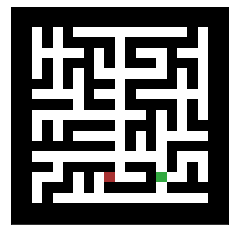

0.1111111111111111


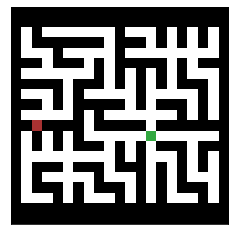

0.2222222222222222


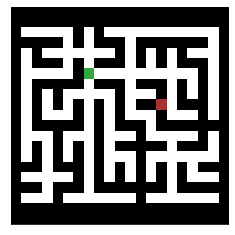

0.3333333333333333


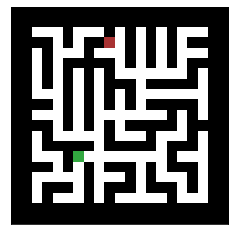

0.4444444444444444


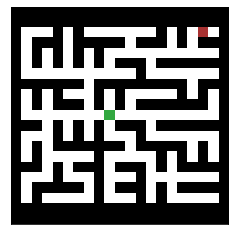

0.5555555555555556


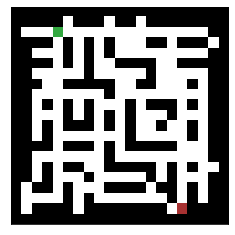

0.6666666666666666


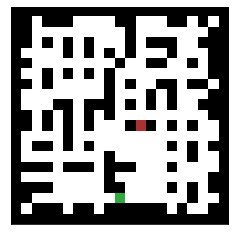

0.7777777777777777


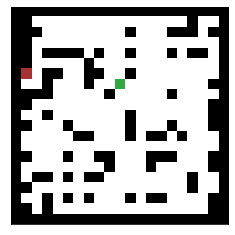

0.8888888888888888


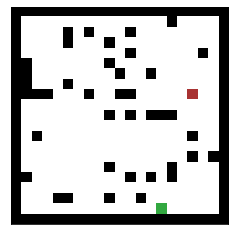

1.0


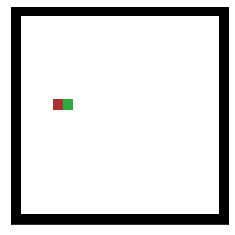

In [4]:
for thres in np.linspace(0,1,10):
    print(thres)
    N, S, F = 21, (random.randint(1, 19), random.randint(1, 19)),(random.randint(1, 19), random.randint(1, 19))
    map = Maze(N=N, S=S, F=F, threshold=thres)
    map.draw_map()

## Μέρος 2

Στο δεύτερο μέρος της εργασίας καλείστε να υλοποιήσετε διάφορους αλγορίθμους εύρεσης συντομότερων μονοπατιών μεταξύ δυο κόμβων για τους λαβυρίνθους που παράγονται από τον κώδικα του πρώτου μέρους. Παράλληλα καλείστε να κατασκευάσετε και διάφορες συναρτήσεις κόστους τόσο για την μέτρηση των πραγματικών αποστάσεων όσο και για την εκτίμηση των αποστάσεων από έναν κόμβο στον κόμβο στόχο (heuristic). Επίσης μπορείτε να πειραματιστείτε με οποιαδήποτε από τις παραμέτρους κάθε αλγορίθμου με σκοπό να μελετήσετε το πώς οι αλλαγές αυτές επηρεάζουν την πολυπλοκότητα, τον χρόνο καθώς και βέλτιστο μονοπάτι. Οι παραπάνω αλγόριθμοι καθώς και οι παραλλαγές τους θα τρέξουν σε λαβυρίνθους με διαφορετικά μεγέθη. Υλοποιήστε τους αλγορίθμους στο κελί κώδικα του Μέρους 2.<br>

Η γενική μορφή της συνάρτησης κόστους στον αλγόριθμο Α* είναι:
$$f(n)=g(n)+h(n)$$
Παραπάνω, η συνάρτηση $g(n)$ δίνει την πραγματική απόσταση από το σημείο εκκίνησης μέχρι τον κόμβο $n$, και η συνάρτηση $h(n)$ αποτελεί μια ευριστική της απόστασης από τον κόμβο $n$ μέχρι τον στόχο. Σας ζητείται να πειραματιστείτε με τις εξής επιλογές για τις δύο συναρτήσεις:
* $g(n)=0$ και $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;
* $g(n)=1$ και $h(n)=0$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;
* $g(n)=1$ και $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Ποιος αλγόριθμος αναζήτησης προκύπτει; Μπορεί να βρει πάντα το βέλτιστο μονοπάτι;

Μπορείτε να προτείνετε και άλλες ευριστικές συναρτήσεις εκτός από τις αποστάσεις manhattan και euclidean;

## Μέρος 2


In [279]:
#Experimental
from scipy.spatial.distance import minkowski
class pathfinder:
    def __init__(self, maze, c, h):
        self.S = maze.get_S()
        self.F = maze.get_F()
        self.cost = c
        self.heuristic = h
        self.maze = maze
        self.path = []
        self.seen = set()
        self.vis = visualization(self.S, self.F)

    def get_neighbors(self, Z):
        neighbors = set()
        x, y = Z
        if x - 1 >= 0 and self.maze.grid[x - 1,y]:
            neighbors.add((x-1,y))
        if x + 1 < self.maze.N and self.maze.grid[x + 1,y]:
            neighbors.add((x+1,y))
        if y - 1 >= 0 and self.maze.grid[x,y - 1]:
            neighbors.add((x,y-1))
        if y + 1 < self.maze.N and self.maze.grid[x,y + 1]:
            neighbors.add((x,y+1))
        return neighbors
    
    def f(self, Z):
        if self.cost == 0:
            if self.heuristic == 0:
                return self.cost
            else:
                return minkowski(Z, self.F, p=self.heuristic)
        elif self.cost == 1:
            if self.heuristic == 0:
                return self.cost
            else:
                return minkowski(Z, self.F, p=self.heuristic)
            
    def find_path(self):
        frontier = {self.S:0}     
        came_from = {}
        came_from[self.S] = None
        cost_so_far = {}
        cost_so_far[self.S] = 0
        self.expanded = set()
        self.no_expanded_nodes = 0
        self.seen.add(self.S)
        
        while frontier != {}:
            sorted_frontier = sorted(frontier.items(), key=operator.itemgetter(1))
            current = sorted_frontier[0][0]
            self.no_expanded_nodes += 1
            del frontier[current]

            if current == self.F:
                break
                
            self.expanded.add(current)           
            neighbors = self.get_neighbors(current)
            for neighbor in neighbors:
                
                temp_cost = self.f(neighbor)
                
                if neighbor in self.expanded and temp_cost >= cost_so_far[neighbor]:
                    continue
                    
                cost_so_far[neighbor] = temp_cost
                
                if neighbor in frontier:
                    if temp_cost <= frontier[neighbor]:
                        frontier[neighbor] = temp_cost
                        came_from[neighbor] = current
                        cost_so_far[neighbor] = temp_cost
                else:
                    frontier[neighbor] = temp_cost
                    came_from[neighbor] = current
                    cost_so_far[neighbor] = temp_cost

        # follow backlinks to build path
        current = self.F
        path = []
        while current != self.S:
            path.append(current)
            if current not in came_from:
                self.maze.draw_map()
            current = came_from[current]
        path.append(self.S)
        path.reverse()
        self.path = path
    
    def set_S(self,S):
        self.S = S
    def set_F(self,F):
        self.F = F
    def get_path(self):
        return self.path
    def get_expanded(self):
        return self.expanded
    def get_complexity(self):
        return self.no_expanded_nodes

- **Θα χρησιμοποιήσουμε τη συνάρτηση minkowski, η οποία αποτελεί τη γενική μορφή της απόστασης manhattan (p=1) και της euclidean (p=2). Πέρα από τους προαναφερθέντες συνδυασμούς θα δοκιμάσουμε λοιπόν και τιμές p=3 για g(n)=0 και g(n)=1.**

- **Δοκιμάζουμε τον αλγόριθμο Α* σε λαβυρίνθους 2 μεγεθών για Ν=21 και Ν=41.**

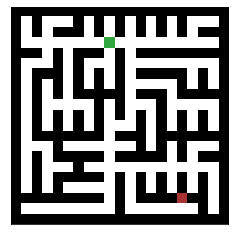

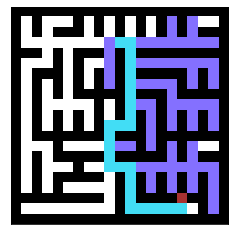

Number of expanded nodes: 103
Wall time: 81 ms


In [74]:
%%time
import operator
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 1)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

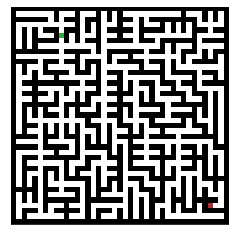

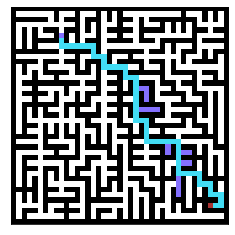

Number of expanded nodes: 83
Wall time: 75 ms


In [75]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 1)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

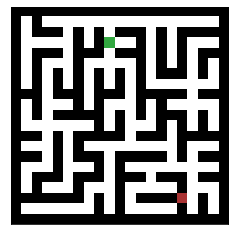

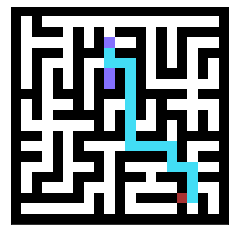

Number of expanded nodes: 27
Wall time: 74 ms


In [76]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 2)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

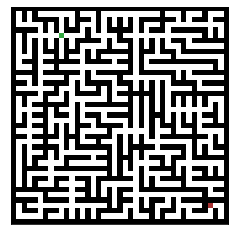

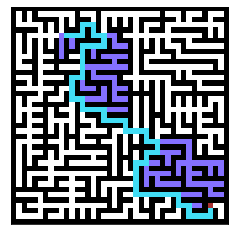

Number of expanded nodes: 213
Wall time: 82 ms


In [77]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 2)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

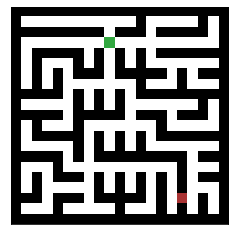

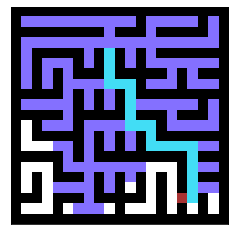

Number of expanded nodes: 165
Wall time: 118 ms


In [78]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 0)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

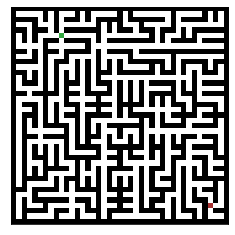

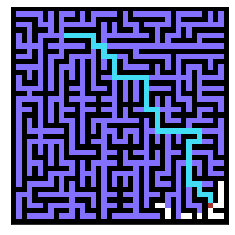

Number of expanded nodes: 782
Wall time: 76 ms


In [79]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 0)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

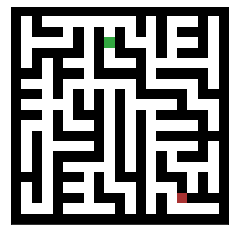

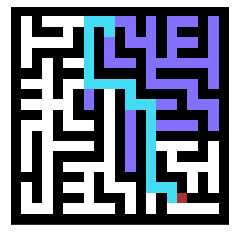

Number of expanded nodes: 91
Wall time: 78 ms


In [80]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 1)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

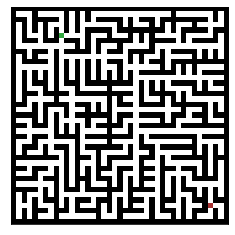

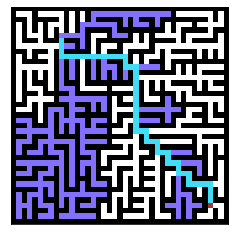

Number of expanded nodes: 369
Wall time: 88 ms


In [81]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 1)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

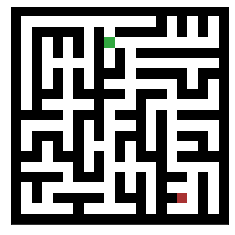

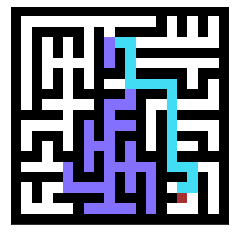

Number of expanded nodes: 71
Wall time: 73 ms


In [82]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 2)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

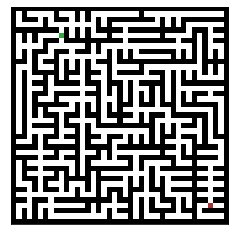

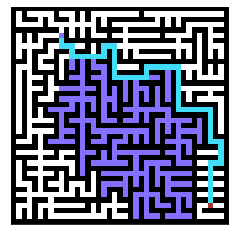

Number of expanded nodes: 369
Wall time: 89 ms


In [83]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 2)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

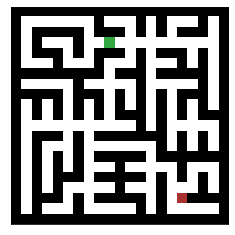

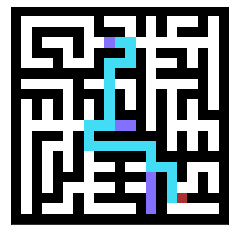

Number of expanded nodes: 37
Wall time: 74 ms


In [84]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

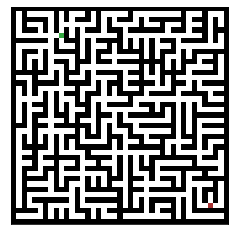

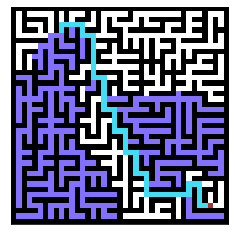

Number of expanded nodes: 468
Wall time: 136 ms


In [85]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

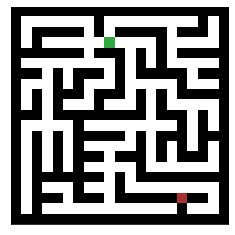

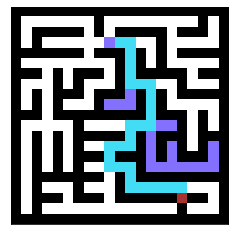

Number of expanded nodes: 51
Wall time: 75.1 ms


In [86]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

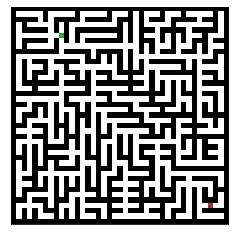

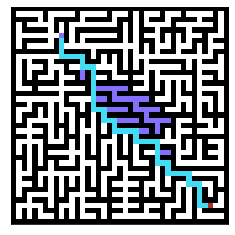

Number of expanded nodes: 105
Wall time: 82 ms


In [87]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

## Μέρος 3

Στο τρίτο μέρος καλείστε να υλοποιήσετε μια συγκριτική μελέτη των αλγορίθμων που κατασκευάσατε στο Μέρος 2 με σκοπό να καταλήξετε σε ορισμένα συμπεράσματα. Οι αλγόριθμοι θα συγκρίνονται με βάση την πολυπλοκότητά τους και το κατά πόσο μπορούν να βρούν το βέλτιστο μονοπάτι. 
 
Για να κρίνουμε τον τρόπο με τον οποίο το μέγεθος του λαβύρινθου επηρεάζει τους αλγορίθμους, κατασκευάζουμε χάρτες με διάσταση $N=[10,20,\ldots,100]$. Για κάθε παραμετροποίηση προτείνεται να κατασκευάζετε 100 διαφορετικούς χάρτες, στους οποίους θα εκτελείτε τους παραπάνω αλγορίθμους.
 
Έπειτα, ζητείται να συλλέξετε τα εξής χαρακτηριστικά:
 * το μήκος του ελάχιστου μονοπατιού που εξάγει ο εκάστοτε αλγόριθμος.
 * το πλήθος των επεκτεταμένων κόμβων (expanded nodes) του κάθε αλγορίθμου, που αποτελεί μέτρο της πολυπλοκότητάς του.
 
 Για να σας είναι εύκολο να εξάγετε συμπεράσματα από τις παραπάνω παραμετροποιήσεις, ζητείται να κατασκευάσετε δύο γραφικές παραστάσεις:
 * το μήκος του ελάχιστου μονοπατιού συναρτήσει του μεγέθους του χάρτη
 * το πλήθος των expanded nodes συναρτήσει του μεγέθους του χάρτη



 Σας ζητείται σχολιάσετε τις παραπάνω γραφικές παραστάσεις, και συγκεκριμένα το πώς μεταβάλλεται η συμπεριφορά των αλγορίθμων συναρτήσει του $N$.
 
 Σημειώνουμε τα παρακάτω:
 
 * Σε όλα τα παραπάνω πειράματα μπορείτε να λάβετε σαν σημείο εκκίνησης το $(1,1)$ και σαν σημείο τερματισμού το $(N-2,N-2)$. Εναλλακτικά, μπορείτε να πειραματισθείτε με τυχαία σημεία εκκινησης και τερματισμού.
 * Αν και οι χάρτες παράγονται τυχαία, η εκτέλεση αλγορίθμων σε διαφορετικούς χάρτες παράγει μη συγκρίσιμα αποτελέσματα.
 * Για λόγους ευκολίας σύγκρισης, προτείνεται να τοποθετήσετε πολλαπλές γραφικές παραστάσεις στο ίδιο σύστημα αξόνων, όπου αυτό είναι εφικτό.

**Visualization**: Παράλληλα με τα παραπάνω σάς δίνεται έτοιμη και μια κλάση η όποια κατασκευάζει ένα animation της αναζήτησης το οποίο υλοποιεί κάθε αλγόριθμος. Για την χρήση της κλάσης αυτής πρέπει να κάνετε τα εξής 4 βήματα:

1.	Δημιουργία ενός instance της κλάσης εκτελώντας την παρακάτω εντολή: `visualization(Start, Goal)`. Η εντολή αυτή δημιουργεί ένα αντικείμενο τύπου visualization. 
2.	Το βίντεο που παράγεται κάθε φορά ουσιαστικά αποτελείται από stacked frames. Συνεπώς σε κάθε βήμα εκτέλεσης όπου δηλαδή θέλουμε να προσθέσουμε ένα frame στο βίντεο πρέπει να καλέσουμε την μέθοδο της κλάσης: `draw_step(grid, frontier, expanded_nodes)` όπου το πρώτο όρισμα είναι ένας χάρτης (τύπου Maze) το δεύτερο μια λίστα με το μέτωπο της αναζήτηση ενώ το τρίτο μια λίστα με τους κόμβους οι όποιοι έχουν ήδη επεκταθεί από τον αλγόριθμο. 
3.	(Προαιρετικό) Αν θέλουμε να προσθέσουμε στο animation και το βέλτιστο μονοπάτι που βρήκε ο αλγόριθμός μας μπορούμε να καλέσουμε την μέθοδο add_path(path) η οποία δέχεται σαν όρισμα μια λίστα με όλους τους κόμβους που ανήκουν στο βέλτιστο μονοπάτι (συμπεριλαμβανομένων και των κόμβων αρχής και τέλους).
4.	Τέλος καλούμε την συνάρτηση `show_gif()` η όποια εμφανίζει το animation. Επίσης μπορούμε και να αποθηκεύσουμε το gif καλώντας την συνάρτηση `save_gif (filename)` (το αρχείο πρέπει να έχει κατάληξη .gif) καθώς επίσης μπορούμε να εμφανίσουμε μόνο το τελευταίο frame καλώντας την συνάρτηση `show_last_frame()` στο όποιο (αν έχουν γίνει όλα όπως παραπάνω) θα φαίνονται όλοι οι κόμβοι οι οποίοι έχουν επεκταθεί από τον αλγόριθμο, το τελευταίο μέτωπο και (προαιρετικά) και το βέλτιστο μονοπάτι.

Μπορείτε να καταλήξετε στα ίδια συμπεράσματα όσον αφορά την πολυπλοκότητα των αλγορίθμων παρατηρώντας το visualization; 


## Μέρος 3

Στο παρακάτω κελί σάς δίνεται ένα παράδειγμα για την κατασκευή γραφικών παραστάσεων. Θα πρέπει να κατασκευάσετε τις δύο γραφικές παραστάσεις σύμφωνα με τα ζητούμενα της άσκησης.

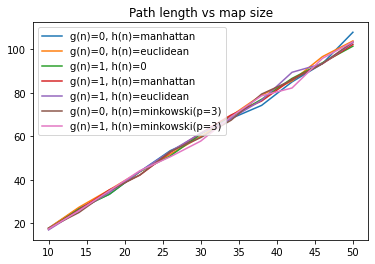

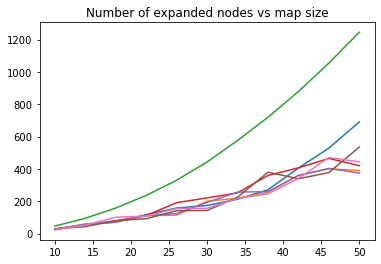

In [88]:
import random
map_sizes = [x for x in range(10, 51, 4)]
trials = 10

h1, h2, h3, h4, h5, h6, h7 = [], [], [], [], [], [], []

for map_size in map_sizes:
    
    path1, path2, path3, path4, path5, path6, path7 = 0, 0, 0, 0, 0, 0, 0
    exp1, exp2, exp3, exp4, exp5, exp6, exp7 = 0, 0, 0, 0, 0, 0, 0
    
    for trial in range(trials):
        
        N = map_size+1
        S = (1,1)
        F = (N-2,N-2)
        maze1 = Maze(N, S, F)
        maze2 = Maze(N, S, F)
        maze3 = Maze(N, S, F)
        maze4 = Maze(N, S, F)
        maze5 = Maze(N, S, F)
        maze6 = Maze(N, S, F)
        maze7 = Maze(N, S, F)
        
        pf1 = pathfinder(maze=maze1, c = 0, h = 1)
        pf2 = pathfinder(maze=maze2, c = 0, h = 2)
        pf3 = pathfinder(maze=maze3, c = 1, h = 0)
        pf4 = pathfinder(maze=maze4, c = 1, h = 1)
        pf5 = pathfinder(maze=maze5, c = 1, h = 2)
        pf6 = pathfinder(maze=maze6, c = 0, h = 3)
        pf7 = pathfinder(maze=maze7, c = 1, h = 3)
        
        pf1.find_path()
        pf2.find_path()
        pf3.find_path()
        pf4.find_path()
        pf5.find_path()
        pf6.find_path()
        pf7.find_path()    
        
        path1 += len(pf1.get_path())
        exp1 += pf1.get_complexity()
        
        path2 += len(pf2.get_path())
        exp2 += pf2.get_complexity()
                    
        path3 += len(pf3.get_path())
        exp3 += pf3.get_complexity()
                    
        path4 += len(pf4.get_path())            
        exp4 += pf4.get_complexity()

        path5 += len(pf5.get_path())
        exp5 += pf5.get_complexity()
        
        path6 += len(pf6.get_path())            
        exp6 += pf6.get_complexity()
        
        path7 += len(pf7.get_path())
        exp7 += pf7.get_complexity()
    
    h1.append((path1/trials, exp1/trials))
    h2.append((path2/trials, exp2/trials))
    h3.append((path3/trials, exp3/trials))
    h4.append((path4/trials, exp4/trials))
    h5.append((path5/trials, exp5/trials))
    h6.append((path6/trials, exp6/trials))
    h7.append((path7/trials, exp7/trials))
    
plt.plot(map_sizes, [i[0] for i in h1])
plt.plot(map_sizes, [i[0] for i in h2])
plt.plot(map_sizes, [i[0] for i in h3])
plt.plot(map_sizes, [i[0] for i in h4])
plt.plot(map_sizes, [i[0] for i in h5])
plt.plot(map_sizes, [i[0] for i in h6])
plt.plot(map_sizes, [i[0] for i in h7])

plt.legend(['g(n)=0, h(n)=manhattan', 'g(n)=0, h(n)=euclidean', 'g(n)=1, h(n)=0', 'g(n)=1, h(n)=manhattan',
            'g(n)=1, h(n)=euclidean', 'g(n)=0, h(n)=minkowski(p=3)', 'g(n)=1, h(n)=minkowski(p=3)' ])

plt.title('Path length vs map size')
plt.show()
plt.plot(map_sizes, [i[1] for i in h1])
plt.plot(map_sizes, [i[1] for i in h2])
plt.plot(map_sizes, [i[1] for i in h3])
plt.plot(map_sizes, [i[1] for i in h4])
plt.plot(map_sizes, [i[1] for i in h5])
plt.plot(map_sizes, [i[1] for i in h6])
plt.plot(map_sizes, [i[1] for i in h7])
plt.title('Number of expanded nodes vs map size')
plt.show()

In [89]:
import random

def plots (threshold):
    
    map_sizes = [x for x in range(10, 51, 4)]
    trials = 10
    h1, h2, h3, h4, h5, h6, h7 = [], [], [], [], [], [], []
    print(f"For threshold = {threshold}")
    for map_size in map_sizes:
    
        path1, path2, path3, path4, path5, path6, path7 = 0, 0, 0, 0, 0, 0, 0
        exp1, exp2, exp3, exp4, exp5, exp6, exp7 = 0, 0, 0, 0, 0, 0, 0
    
        for trial in range(trials):
        
            N = map_size+1
            S = (1,1)
            F = (N-2,N-2)
            maze1 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze2 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze3 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze4 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze5 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze6 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze7 = Maze(N=N, S=S, F=F, threshold=threshold)
        
            pf1 = pathfinder(maze=maze1, c = 0, h = 1)
            pf2 = pathfinder(maze=maze2, c = 0, h = 2)
            pf3 = pathfinder(maze=maze3, c = 1, h = 0)
            pf4 = pathfinder(maze=maze4, c = 1, h = 1)
            pf5 = pathfinder(maze=maze5, c = 1, h = 2)
            pf6 = pathfinder(maze=maze6, c = 0, h = 3)
            pf7 = pathfinder(maze=maze7, c = 1, h = 3)
        
            pf1.find_path()
            pf2.find_path()
            pf3.find_path()
            pf4.find_path()
            pf5.find_path()
            pf6.find_path()
            pf7.find_path()    
        
            path1 += len(pf1.get_path())
            exp1 += pf1.get_complexity()
        
            path2 += len(pf2.get_path())
            exp2 += pf2.get_complexity()
                    
            path3 += len(pf3.get_path())
            exp3 += pf3.get_complexity()
                    
            path4 += len(pf4.get_path())            
            exp4 += pf4.get_complexity()

            path5 += len(pf5.get_path())
            exp5 += pf5.get_complexity()
        
            path6 += len(pf6.get_path())            
            exp6 += pf6.get_complexity()
        
            path7 += len(pf7.get_path())
            exp7 += pf7.get_complexity()
    
        h1.append((path1/trials, exp1/trials))
        h2.append((path2/trials, exp2/trials))
        h3.append((path3/trials, exp3/trials))
        h4.append((path4/trials, exp4/trials))
        h5.append((path5/trials, exp5/trials))
        h6.append((path6/trials, exp6/trials))
        h7.append((path7/trials, exp7/trials))
    
    plt.plot(map_sizes, [i[0] for i in h1])
    plt.plot(map_sizes, [i[0] for i in h2])
    plt.plot(map_sizes, [i[0] for i in h3])
    plt.plot(map_sizes, [i[0] for i in h4])
    plt.plot(map_sizes, [i[0] for i in h5])
    plt.plot(map_sizes, [i[0] for i in h6])
    plt.plot(map_sizes, [i[0] for i in h7])

    plt.legend(['g(n)=0, h(n)=manhattan', 'g(n)=0, h(n)=euclidean', 'g(n)=1, h(n)=0', 'g(n)=1, h(n)=manhattan',
                'g(n)=1, h(n)=euclidean', 'g(n)=0, h(n)=minkowski(p=3)', 'g(n)=1, h(n)=minkowski(p=3)' ])

    plt.title('Path length vs map size')
    plt.show()
    plt.plot(map_sizes, [i[1] for i in h1])
    plt.plot(map_sizes, [i[1] for i in h2])
    plt.plot(map_sizes, [i[1] for i in h3])
    plt.plot(map_sizes, [i[1] for i in h4])
    plt.plot(map_sizes, [i[1] for i in h5])
    plt.plot(map_sizes, [i[1] for i in h6])
    plt.plot(map_sizes, [i[1] for i in h7])
    plt.title('Number of expanded nodes vs map size')
    plt.show()


For threshold = 0.5


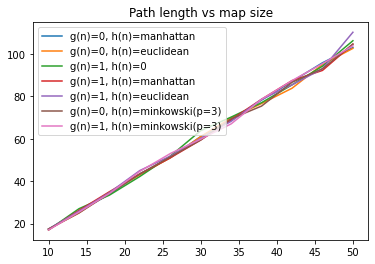

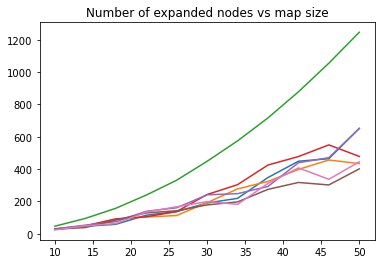

In [90]:
plots(0.5)

For threshold = 0.6


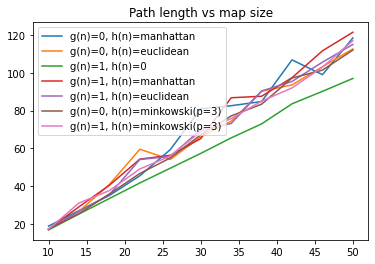

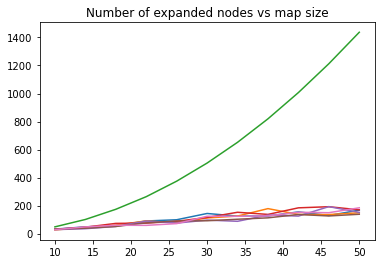

In [91]:
plots(0.6)

For threshold = 0.7


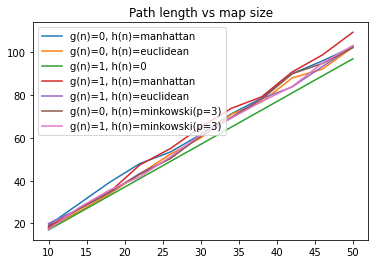

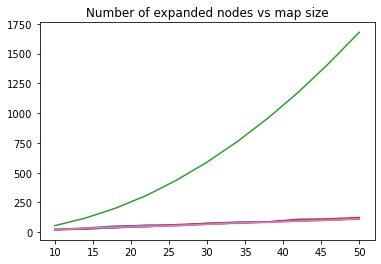

In [92]:
plots(0.7)

For threshold = 0.8


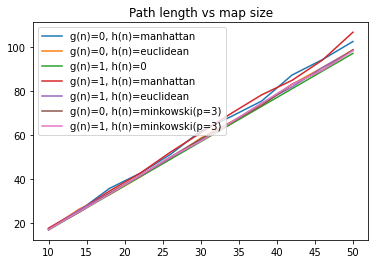

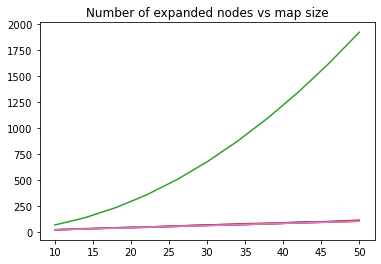

In [93]:
plots(0.8)

For threshold = 0.9


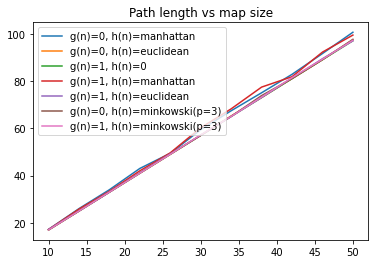

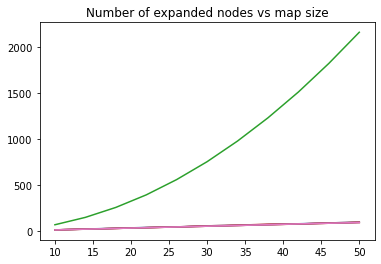

In [94]:
plots(0.9)

## Μέρος 4

Στο τέταρτο μέρος της εργασίας στο λαβύρινθο υπάρχει ένα φάντασμα 👻! Ο στόχος είναι να φτάσουμε στο σημείο τερματισμού αποφεύγοντας το φάντασμα, το οποίο μας κυνηγάει τρέχοντας σε κάθε βήμα τον δικό του Α*. Ο κώδικας που τρέχει το φάντασμα ''Agent'' σας δίνεται έτοιμος.

Για την αποφυγή του φαντάσματος θα υλοποιήσουμε τον αλγόριθμο ΑΒ. Συγκεκριμένα, σας δίνεται η κλάση ''ΑΒagent'' στην οποία καλείστε να συμπληρώσετε τις κινήσεις του minimizing_player (όπως διδαχθήκατε στο μάθημα), δεδομένων των αντίστοιχων κινήσεων του maximizing_player. Στα πλαίσια του αλγορίθμου αυτού θα χρειαστεί να ορίσετε μια ευριστική συνάρτηση η οποία εκτιμά το κόστος της επόμενης κατάστασης συνυπολογίζοντας την απόσταση τόσο από το στόχο και από το φάντασμα. 

Περιγράψτε στο κατάλληλο markdown κελί τη συλλογιστική πορεία για τις επιλογές σας όσον αφορά την ευριστική. Πώς υπολογίσατε τις αποστάσεις (με εκτίμηση/πραγματική μετρική); Αναφέρετε αναλυτικά τα αποτέλεσματα και τις παρατηρήσεις σας σχετικά με τις παραπάνω επιλογές. Μεγαλύτερη σημασία έχει ο πειραματισμός και η αναφορά των αποτελεσμάτων, όσον αφορά αφορά την ευριστική, παρά η αναζήτηση της καλύτερης συνάρτησης. Ως αποτελέσματα ζητείται να παραθέσετε: χαρακτηριστικά gifs και χρόνους εκτέλεσης. Δικαιολογείστε γιατί ο αλγόριθμός σας δουλεύει ορθά. 

**ΠΡΟΣΟΧΗ!** Στο 4ο μέρος οι λαβύρινθοι που θα χρησιμοποιήσετε πρέπει να είναι αραιοί ως προς τα εμπόδια. Αν τα υπάρχοντα μονοπάτια προς το στόχο είναι λίγα, θα είναι δύσκολο να ξεφύγετε από το φάντασμα ανεξαρτήτως υλοποίησης.

## Μερος 4

Πρώτα, σας δίνεται αυτούσιος ο κώδικας του φαντάσματος. Το φάντασμα μας κυνηγάει τρέχοντας Α* με στόχο τη θέση μας.

In [293]:
class Agent:
    def __init__(self,S,grid,color, name = ""):
        self.agent_name = name
        self.location = S
        self.color=color
        self.maze = grid
        self.maze.agents.append(self)
        self.maze.grid[S]=1
        self.path=[]

    def find_path(self,F):
        c = 1
        h = 2
        pf = pathfinder(self.maze, c, h)
        pf.set_S(self.location)
        pf.set_F(F)
        pf.find_path()
        self.path = pf.path

    def move(self):
        if len(self.path)<1:
            return
        if self.location==self.path[0] and len(self.path)>1:
            self.location=self.path[1]
            self.path = self.path[2:]
        else:
            print("Here")
            self.location=self.path[0]
            self.path=self.path[1:]

    def move_to(self, loc):
        self.location = loc
    
    def get_location(self):
        return self.location
    def get_path(self):
        return self.path

Στη συνέχεια, δίνεται ο κώδικας για τον agent που τρέχει να ξεφύγει. Ο ABagent τρέχει ΑΒ με σκοπό να φτάσει στον τερματισμό χωρίς να τον πιάσει το φάντασμα. Καλείστε να συμπληρώσετε τα σημεία που παραλείπονται. Δώστε ιδιαίτερη προσοχή στην ευριστική συνάρτηση. Εξηγείστε τις επιλογές σας, όπως περιγράφεται παραπάνω.

In [313]:
class ABagent:
    def __init__(self, S, grid, color, name = "", p=1):
        self.agent_name = name
        self.location = S
        self.color=color
        self.maze = grid
        self.maze.agents.append(self)
        self.maze.grid[S]=1
        self.path=[]
        self.p=p

    def get_best_action(self, ghosts, depth = 3):
        best_action = None
        best_score = float("-inf") #you can use this for debugging
        alpha = float("-inf")
        beta = float("inf")

        best_score, best_action = self.alpha_beta_agent(self.maze, self.location, ghosts, depth, alpha, beta, True)

        return best_action

    def alpha_beta_agent(self, maze, agent_pos, ghost_positions, depth, alpha, beta, maximizing_player=True):
        if depth == 0 or self.is_win(maze, agent_pos) or self.is_lose(agent_pos, ghost_positions):
            # Return the heuristic value if we've reached the maximum depth or the game is over
            return self.heuristic_AB(map, agent_pos, ghost_positions, self.p), agent_pos

        if maximizing_player:
            # Agent is the maximizing player
            best_score = float("-inf")
            best_action = None
            for successor_state in maze.adjacent_no_walls(agent_pos):
                score, _ = self.alpha_beta_agent(maze, successor_state, ghost_positions, depth - 1, alpha, beta, False)
                if score > best_score:
                    best_score = score
                    best_action = successor_state
                alpha = max(alpha, score)
                if beta <= alpha:
                    break
            return best_score, best_action
        else:
            # Ghosts are the minimizing players
            best_score = float("inf")
            best_action = None
            for ghost_pos in ghost_positions:
                for successor_state in maze.adjacent_no_walls(ghost_pos):
                    score, _ = self.alpha_beta_agent(maze, agent_pos, ghost_positions, depth - 1, alpha, beta, True)
                    if score < best_score:
                        best_score = score
                        best_action = successor_state
                    beta = min(beta, score)
                    if beta <= alpha:
                        break
            return best_score, best_action

    def is_win(self, maze, agent_pos):
        if agent_pos == maze.get_F():
            return True
        return False
    
    def is_lose(self, agent, ghosts):
        return agent in ghosts

    def heuristic_AB(self, maze, agent_pos, ghost_positions, p):
        dist_to_ghosts = [minkowski(agent_pos, ghost_pos, p) for ghost_pos in ghost_positions]
        min_dist_to_ghost = min(dist_to_ghosts)
        
        if min_dist_to_ghost > 8:
            return - minkowski(agent_pos, maze.get_F(), 2)            
        else:
            return min_dist_to_ghost - minkowski(agent_pos, maze.get_F(), 2)

    def move_to(self, loc):
        self.location = loc

Φτιάχνουμε αραιό χάρτη και ορίζουμε τους agents.

22 10


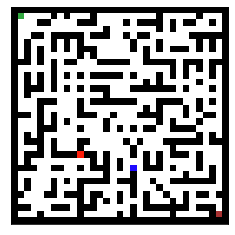

In [314]:
#create a sparse map with many paths, like the one below
maze = Maze(N=33, S=(1,1), F=(31,31), threshold=0.65)
x, y = np.random.choice(range(1, 31)), np.random.choice(range(1, 31))
print(x,y)
ghost = (Agent((x, y), maze, [255,30,10], "ghost"))
                  
a1 = ABagent((np.random.choice(range(1, 31)), np.random.choice(range(1, 31))), maze,[30,10,255], "agentAB", 2)

maze.draw_map()

In [315]:
vis=visualization((1,1),(31,31))

visited = [a1.location] #HINT: this might be helpful to you

for i in range(300):
    if a1.location==(31,31):
        print("Win")
        break

    if a1.location == ghost.location:
        print("Lose")
        break

    if i%2==0: #controls agent speed
        best_move = a1.get_best_action([ghost.location], 5)
        a1.move_to(best_move)
        visited.append(a1.location)
        #print(a1.location)

    if i%2==1: #controls ghost speed
        ghost.find_path(a1.location)
        ghost.move()

    im = maze.draw_map(return_image=True)
    vis.images.append(im)

In [316]:
vis.create_gif(fps=1)
vis.save_gif("first.gif", fps = 30)
vis.show_gif()

## Μέρος 5 (bonus)

Στο πέμπτο και τελευταίο μέρος της εργασίας σάς δίνεται η δυνατότητα να κατασκευάσετε λαβυρίνθους με το χέρι, ζωγραφίζοντας. Για το σκοπό αυτό σας δίνεται η συνάρτηση draw(filename='filename.png') η οποία παράγει ένα interactive grid ώστε να σχηματίσετε το λαβύρινθο. Θεωρήστε ως μαύρο το χρώμα του εμποδίου, πράσινο την αφετηρία και κόκκινο το στόχο, και πατήστε finish για να ολοκληρωθεί η εκτέλεση του τρέχοντος κελιού. Σε περίπτωση που θέλετε να παράξετε νέο λαβύρινθο, απλά ξανατρέξτε το κελί, επιλέξτε τα τετράγωνα και πατήστε finish. Κάθε εκτέλεση αποθηκεύει την εικόνα σε μορφή png σε όνομα που μπορείτε να καθορίσετε μέσω του filename (τοποθετώντας και την κατάληξη .png) κατά την κλήση της συνάρτησης.  

Καλείστε λοιπόν να **κατασκευάσετε** και να **σχολιάσετε** τους παρακάτω 5 λαβυρίνθους, οι οποίοι θα ικανοποιούν τις παρακάτω συνθήκες:


*   **Λαβύρινθος 1**: Ο Hill-climbing δεν βρίσκει μονοπάτι από την αφετηρία στο στόχο.
*   **Λαβύρινθος 2**: Ο Α* αργεί όσο το δυνατόν περισσότερο να βρει το βέλτιστο μονοπάτι ανεξαρτήτως της μετρικής απόστασης που χρησιμοποιείται ως ευριστική. Σε τι είδους μονοπάτι η επιλογή διαφορετικής μετρικής απόστασης (Ευκλίδεια/Manhattan) ως ευριστικής οδηγεί τον Α* να βρίσκει το μονοπάτι πιο γρήγορα;
*   **Λαβύρινθος 3**: Ο αλγόριθμος άπληστης αναζήτησης πρώτα στο καλύτερο (greedy best first) αργεί σημαντικά περισσότερο από τον Α* για να καταλήξει στο στόχο. Σε ποια περίπτωση οι δύο αλγόριθμοι θα συμπεριφέρονταν με τον ίδιο τρόπο;
*   **Λαβύρινθος 4**: Ο Α* καταφέρνει να βρει το μονοπάτι προς το στόχο σημαντικά πιο γρήγορα από τον Dijkstra. Ο χώρος πρέπει αναγκαστικά να περιέχει εμπόδια. Πώς επηρεάζει το μέγεθος/είδος του εμποδίου τον αριθμό βημάτων που χρειάζεται ο Dijsktra και πώς τον αριθμό βημάτων του Α*;
*   **Λαβύρινθος 5**: Ο Α* και ο Dijkstra φτάνουν στο στόχο πραγματοποιώντας τον ίδιο ακριβώς αριθμό βημάτων για την προσέγγιση της βέλτιστης διαδρομής. Σημείωση: **αγνοήστε** την τετριμμένη περίπτωση όπου ο Α* συμπεριφέρεται όπως ο Dijkstra (h(n)=0). 


Ο Α* σε όλες τις περιπτώσεις πραγματοποιεί τη βέλτιστη δυνατή αναζήτηση.   


Για κάθε λαβύρινθο που σχηματίζετε, δώστε μια σύντομη εξήγηση για την επιλογή σας.  

**ΠΡΟΣΟΧΗ:** το output των κελιών που σχηματίζετε διατηρείται για περιορισμένο χρονικό διάστημα στο notebook, γι αυτό καλείστε να αποθηκεύσετε τη φωτογραφία (το πραγματοποιεί η συνάρτηση draw()) και να τη μεταφέρετε στο ανάλογο markdown ώστε να μπορέσουμε να την αξιολογήσουμε.


Στη συνέχεια, καλείστε να τρέξετε τους αλγορίθμους pathfinding πάνω στους χάρτες που σχηματίσατε. Για το σκοπό αυτό, μετά την εκτέλεση της draw() καλείτε τη συνάρτηση draw_grid() που μετατρέπει την εικόνα που σχηματίσατε σε χάρτη πάνω στον οποίο μπορούν να τρέξουν οι αλγόριθμοι με χρήση της συνάρτησης pathfinder(). Χρειάζεται να επιλέξετε κατάλληλα τα ορίσματα της pathfinder ώστε να καλέσετε το σωστό αλγόριθμο αναζήτησης σε κάθε ερώτημα. Εκτελέστε τα αντίστοιχα κελιά με τον κώδικα που σας δίνεται και παρουσιάστε την έξοδο αυτών. Φυσικά, εάν ένα ερώτημα περιλαμβάνει την εκτέλεση περισσότερων του ενός αλγορίθμου, αντιγράφετε τα αντίστοιχα κελιά για κάθε αλγόριθμο και τοποθετείτε τα σωστά ορίσματα. Τέλος, η show_gif() σάς παρουσιάζει το animation, όπως και στο Μέρος 3.
**Παρατήρηση:** εφόσον δε σας δίνεται/δεν έχετε υλοποιήσει τον Hill climbing, δε σας ζητείται να τον τρέξετε στο χάρτη που θα σχηματίσετε.

## Μέρος 5: Bonus

Υπενθυμίζεται ότι το output των κελιών που σχηματίζετε διατηρείται για περιορισμένο χρονικό διάστημα στο notebook, γι αυτό καλείστε να αποθηκεύσετε τη φωτογραφία (το πραγματοποιεί η συνάρτηση draw()) και να τη μεταφέρετε στο ανάλογο markdown.

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL


canvas_html = """
<canvas width=301 height=301></canvas>
<br>

<button id = "start" style="background-color: #008000">Start</button>
<button id = "end" style="background-color: #800000">End</button>
<button id = "finish">Finish</button>
<script>

var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

for (var x = 0.5; x < 301; x += 20) {
  ctx.moveTo(x, 0);
  ctx.lineTo(x, 300);
}

for (var y = 0.5; y < 301; y += 20) {
  ctx.moveTo(0, y);
  ctx.lineTo(300, y);
}

ctx.strokeStyle = "#000";
ctx.stroke();

var button = document.getElementById('finish')
var start_button = document.getElementById('start')
var end_button = document.getElementById('end')


start_button.onclick = ()=>{
    ctx.fillStyle="#008000";
  }

end_button.onclick = ()=>{
    ctx.fillStyle="#800000";
  }
   

var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})

function getMousePos(canvas, evt) {
        var rect = canvas.getBoundingClientRect();
        return {
          x: evt.x - rect.left,
          y: evt.y - rect.top
        };
      }

function getNearestSquare(position) {
    var x = position.x;
    var y = position.y;

    if (x < 0 || y < 0) return null;
    x = (Math.floor(x / 20) * 20) + 0.5
    y = (Math.floor(y / 20) * 20) + 0.5
    return {x: x, y: y};
}

function containsObject(obj, list) {
    var i;
    for (i = 0; i < list.length; i++) {
        if (list[i].x === obj.x && list[i].y == obj.y) {
            return i;
        }
    }
    return -1;
}

borders = []

canvas.onmousedown = ()=>{
    var pos = getNearestSquare(getMousePos(canvas, mouse));
    if (pos != null) {
        index = containsObject(pos, borders)
        if (index != -1){
            borders.splice(index, 1)
            ctx.clearRect(pos.x + 1, pos.y, 19, 19)
        }
        else{
            ctx.fillRect(pos.x+1,pos.y+1,18,18);
            borders.push(pos)
        }
        ctx.fillStyle="#000000";
    }
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png'):
  display(HTML(canvas_html))
  data = eval_js("data")
  print (data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)


draw()

In [ ]:
def find_points(image_array, pixels):
    points = []
    for grid_i, i in enumerate(range (10, image_array.shape[0]-10, 20)):
        for grid_j, j in enumerate(range (10, image_array.shape[1]-10, 20)):
            if np.array_equal(image_array[i][j], pixels):
                points.append([grid_i+1, grid_j+1])
    return points

def draw_grid(fname='/content/drawing.png'):
    N = 17
    image = PIL.Image.open(fname)
    image_array = np.round(np.array(image)/255)

    start_x, start_y = find_points(image_array, [0,1,0,1])[0]
    end_x, end_y = find_points(image_array, [1, 0, 0, 1])[0]
    walls = find_points(image_array, [0, 0, 0, 1])
    new_grid = Maze(N, (start_x, start_y), (end_x, end_y))

    for i in range(N):
        for j in range(N):
            if [i, j] in walls:
                new_grid.grid[i,j] = 0
            else:
                new_grid.grid[i, j] = 1

    g = new_grid
    g.draw_map()
    return g

g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, lambda x, y: 1, lambda x, y: 0)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.1.  

In [ ]:
draw(filename='5.1.png')

#### Εισάγετε εδώ την φωτογραφία όπως αυτή προέκυψε από την εκτέλεση και αλληλεπίδραση με το παραπάνω κελί.  


#### Εισάγετε εδώ το σχολιασμό σας    



(Υπενθύμιση: για τον Hill Climbing δε χρειάζετει να τρέξετε το χάρτη που σχηματίσατε)

### 5.2.  

In [ ]:
draw(filename='5.2.png')

#### Εισάγετε εδώ την φωτογραφία όπως αυτή προέκυψε από την εκτέλεση και αλληλεπίδραση με το παραπάνω κελί.  


#### Εισάγετε εδώ το σχολιασμό σας 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.3.

In [ ]:
draw(filename='5.3.png')

#### Εισάγετε εδώ την φωτογραφία όπως αυτή προέκυψε από την εκτέλεση και αλληλεπίδραση με το παραπάνω κελί.  


#### Εισάγετε εδώ το σχολιασμό σας 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.4.  

In [ ]:
draw(filename='5.4.png')

#### Εισάγετε εδώ την φωτογραφία όπως αυτή προέκυψε από την εκτέλεση και αλληλεπίδραση με το παραπάνω κελί.  


#### Εισάγετε εδώ το σχολιασμό σας 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.5  

In [ ]:
draw(filename='5.5.png')

#### Εισάγετε εδώ την φωτογραφία όπως αυτή προέκυψε από την εκτέλεση και αλληλεπίδραση με το παραπάνω κελί.  


#### Εισάγετε εδώ το σχολιασμό σας 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()